<a href="https://colab.research.google.com/github/Herbertkid/5G_Impact_On_Canada_GDP/blob/main/CanadaGDPimpact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

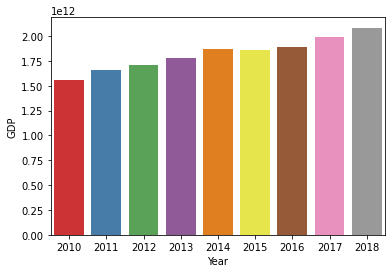

In [ ]:
caData = {
    "Year" : [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
    "GDP" : [1559049000000, 1662354000000, 1710433000000, 1781930000000, 1867752000000, 1856814000000,
             1886103000000, 1991534000000, 2083379000000]}
dfCAGDP = pd.DataFrame(caData)
dfCAGDP['GDPgrowth'] = (dfCAGDP['GDP'] - dfCAGDP['GDP'].shift(1))
# dfGrowth = pd.concat([dfCAGDP.iloc[:,0],dfGrowth1],axis = 1).dropna()
sns.barplot(x='Year', y='GDP', data=dfCAGDP, palette='Set1')

In [ ]:
dfCAGDP = dfCAGDP.dropna()
dfCAGDP

,Year,GDP,GDPgrowth
1,2011,1662354000000,1.033050e+11
2,2012,1710433000000,4.807900e+10
3,2013,1781930000000,7.149700e+10
4,2014,1867752000000,8.582200e+10
5,2015,1856814000000,-1.093800e+10
6,2016,1886103000000,2.928900e+10
7,2017,1991534000000,1.054310e+11
8,2018,2083379000000,9.184500e+10


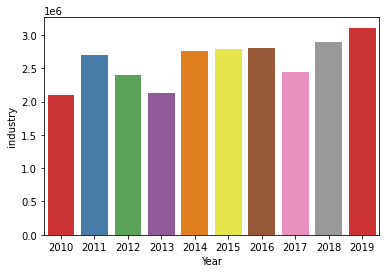

In [ ]:
dfex = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/expenditure.csv')
dfex['industry'] = dfex['industry']/1000
sns.barplot(x='Year', y='industry', data=dfex, palette='Set1')

In [ ]:
dfex

,Year,land,a,b,xk,xm,industry
0,2010,9984670,4.464,0.000165,3.79,9.815145,2092700.0
1,2011,9984670,4.464,0.000165,3.83,9.918735,2706500.0
2,2012,9984670,4.464,0.000165,3.87,10.022325,2406300.0
3,2013,9984670,4.464,0.000165,3.91,10.125915,2124400.0
4,2014,9984670,4.464,0.000165,3.95,10.229504,2760400.0
5,2015,9984670,4.464,0.000165,3.98,10.307197,2795000.0
6,2016,9984670,4.464,0.000165,4.03,10.436684,2810200.0
7,2017,9984670,4.464,0.000165,4.08,10.566172,2448100.0
8,2018,9984670,4.464,0.000165,4.13,10.695659,2901600.0
9,2019,9984670,4.464,0.000165,4.19,10.851044,3108900.0


In [ ]:
def calculateEX(xk, industry):
  a = 4.464
  b = 0.000165
  land = 9984670
  return (xk/pow(0.6214,2)*b+a)*pow(0.6214,2)*land+industry
def wrapper(row):
  return calculateEX(row['xk'],row['industry'])
def calculateEXxin(xk):
  a = 4.464
  b = 0.000165
  land = 9984670
  return (xk/pow(0.6214,2)*b+a)*pow(0.6214,2)*land
def wrapperxin(row):
  return calculateEXxin(row['xk'])

In [ ]:
dfex['expenditure'] = dfex.apply(wrapper, axis=1)
dfex['expenditurexIN'] = dfex.apply(wrapperxin, axis=1)
dfex['exgrowth'] = (dfex['expenditure'] - dfex['expenditure'].shift(1)).dropna()
dfex = dfex.dropna()
dfex

,Year,land,a,b,xk,xm,industry,expenditure,expenditurexIN,exgrowth
1,2011,9984670,4.464,0.000165,3.83,9.918735,2706500.0,1.992358e+07,1.721708e+07,613865.898822
2,2012,9984670,4.464,0.000165,3.87,10.022325,2406300.0,1.962345e+07,1.721715e+07,-300134.101178
3,2013,9984670,4.464,0.000165,3.91,10.125915,2124400.0,1.934162e+07,1.721722e+07,-281834.101178
4,2014,9984670,4.464,0.000165,3.95,10.229504,2760400.0,1.997768e+07,1.721728e+07,636065.898822
5,2015,9984670,4.464,0.000165,3.98,10.307197,2795000.0,2.001233e+07,1.721733e+07,34649.424116
6,2016,9984670,4.464,0.000165,4.03,10.436684,2810200.0,2.002761e+07,1.721741e+07,15282.373528
7,2017,9984670,4.464,0.000165,4.08,10.566172,2448100.0,1.966560e+07,1.721750e+07,-362017.626472
8,2018,9984670,4.464,0.000165,4.13,10.695659,2901600.0,2.011918e+07,1.721758e+07,453582.373527
9,2019,9984670,4.464,0.000165,4.19,10.851044,3108900.0,2.032658e+07,1.721768e+07,207398.848233


In [ ]:
dfCAGDP['exgrowth'] = dfex['exgrowth']
dfCAGDP['multiplier'] = abs(dfCAGDP['GDPgrowth']/ dfCAGDP['exgrowth']).dropna(axis=0)
dfCAGDP['Year'] = pd.to_datetime(dfCAGDP['Year'],format='%Y')
dfCAGDP.index = dfCAGDP['Year']
dfCAGDP

,Year,GDP,GDPgrowth,exgrowth,multiplier
Year,,,,,
2011-01-01,2011-01-01,1662354000000,1.033050e+11,613865.898822,1.682859e+05
2012-01-01,2012-01-01,1710433000000,4.807900e+10,-300134.101178,1.601917e+05
2013-01-01,2013-01-01,1781930000000,7.149700e+10,-281834.101178,2.536847e+05
2014-01-01,2014-01-01,1867752000000,8.582200e+10,636065.898822,1.349263e+05
2015-01-01,2015-01-01,1856814000000,-1.093800e+10,34649.424116,3.156762e+05
2016-01-01,2016-01-01,1886103000000,2.928900e+10,15282.373528,1.916522e+06
2017-01-01,2017-01-01,1991534000000,1.054310e+11,-362017.626472,2.912317e+05
2018-01-01,2018-01-01,2083379000000,9.184500e+10,453582.373527,2.024880e+05


In [ ]:

dfex['Year'] = pd.to_datetime(dfex['Year'],format='%Y')  
dfex.index = dfex['Year']
dfex

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Year,land,a,b,xk,xm,industry,expenditure,expenditurexIN,exgrowth
Year,,,,,,,,,,
2011-01-01,2011-01-01,9984670,4.464,0.000165,3.83,9.918735,2706500.0,1.992358e+07,1.721708e+07,613865.898822
2012-01-01,2012-01-01,9984670,4.464,0.000165,3.87,10.022325,2406300.0,1.962345e+07,1.721715e+07,-300134.101178
2013-01-01,2013-01-01,9984670,4.464,0.000165,3.91,10.125915,2124400.0,1.934162e+07,1.721722e+07,-281834.101178
2014-01-01,2014-01-01,9984670,4.464,0.000165,3.95,10.229504,2760400.0,1.997768e+07,1.721728e+07,636065.898822
2015-01-01,2015-01-01,9984670,4.464,0.000165,3.98,10.307197,2795000.0,2.001233e+07,1.721733e+07,34649.424116
2016-01-01,2016-01-01,9984670,4.464,0.000165,4.03,10.436684,2810200.0,2.002761e+07,1.721741e+07,15282.373528
2017-01-01,2017-01-01,9984670,4.464,0.000165,4.08,10.566172,2448100.0,1.966560e+07,1.721750e+07,-362017.626472
2018-01-01,2018-01-01,9984670,4.464,0.000165,4.13,10.695659,2901600.0,2.011918e+07,1.721758e+07,453582.373527
2019-01-01,2019-01-01,9984670,4.464,0.000165,4.19,10.851044,3108900.0,2.032658e+07,1.721768e+07,207398.848233


In [ ]:
import statsmodels.api as sm
 

fit1 = sm.tsa.statespace.SARIMAX(dfCAGDP['multiplier'], order=(6,0, 0), seasonal_order=(0, 0, 0, 12)).fit()
y_pred3 = fit1.predict(start="2019-01-01", end="2030-01-01", dynamic=True)
fitindustry = sm.tsa.statespace.SARIMAX(dfex['industry'], order=(6,0, 0), seasonal_order=(0, 0, 0, 12)).fit()
y_predindustry = fitindustry.predict(start="2019-01-01", end="2030-01-01", dynamic=True)
fitpo = sm.tsa.statespace.SARIMAX(dfex['xk'], order=(4,0, 0), seasonal_order=(0, 0, 0, 12)).fit()
y_predpo = fitpo.predict(start="2019-01-01", end="2030-01-01", dynamic=True)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting para

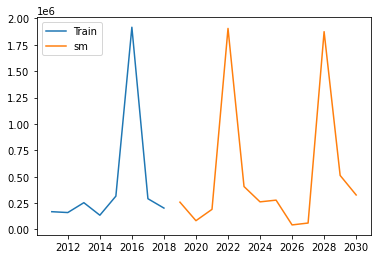

In [ ]:
plt.plot(dfCAGDP['Year'],dfCAGDP['multiplier'], label='Train')
plt.plot(y_pred3.index,y_pred3.values, label='sm')
plt.legend(loc='best')

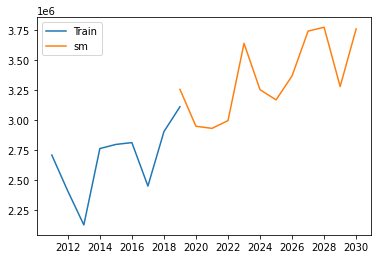

In [ ]:
plt.plot(dfex['Year'],dfex['industry'], label='Train')
plt.plot(y_predindustry.index,y_predindustry.values, label='sm')
plt.legend(loc='best')

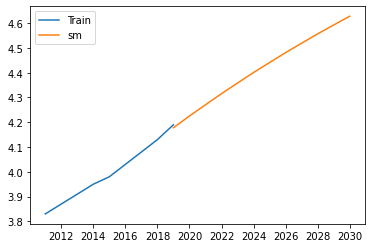

In [ ]:
plt.plot(dfex['Year'],dfex['xk'], label='Train')
plt.plot(y_predpo.index,y_predpo.values, label='sm')
plt.legend(loc='best')

In [ ]:
x3_pred = np.array([2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030])
dfpred3 = pd.DataFrame({'Year': x3_pred, 'multiplier': y_pred3.values, 'xk':y_predpo.values, 'industry':y_predindustry.values})

dfpred3['Year'] = pd.to_datetime(dfpred3['Year'],format='%Y')  
dfpred3

,Year,multiplier,xk,industry
Year,,,,
2019-01-01,2019-01-01,2.586841e+05,4.177834,3.253757e+06
2020-01-01,2020-01-01,8.305386e+04,4.225297,2.946418e+06
2021-01-01,2021-01-01,1.905244e+05,4.270558,2.928849e+06
2022-01-01,2022-01-01,1.905284e+06,4.315475,2.993494e+06
2023-01-01,2023-01-01,4.066928e+05,4.358228,3.636873e+06
2024-01-01,2024-01-01,2.615704e+05,4.400676,3.251101e+06
2025-01-01,2025-01-01,2.778558e+05,4.441000,3.166195e+06
2026-01-01,2026-01-01,4.297973e+04,4.481057,3.366461e+06
2027-01-01,2027-01-01,6.076690e+04,4.519029,3.739108e+06


In [ ]:
dfpred3['expenditure'] = dfpred3.apply(wrapper, axis=1)

dfpred3['exgrowth'] = (dfpred3['expenditure'] - dfpred3['expenditure'].shift(1)).dropna()

dfpred3['exgrowth'][0] = dfpred3['expenditure'][0] - dfex['expenditure']['2018-01-01']
dfpred3['GDPgrowth'] = abs(dfpred3['exgrowth']*dfpred3['multiplier'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
dfpred3.insert(dfpred3.shape[1],'GDP',0)
dfpred3['GDP'][0] = dfpred3['GDPgrowth'][0]+2083379000000
for i in range(1,len(dfpred3)):
  dfpred3['GDP'][i] = dfpred3['GDPgrowth'][i]+dfpred3['GDP'][i-1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


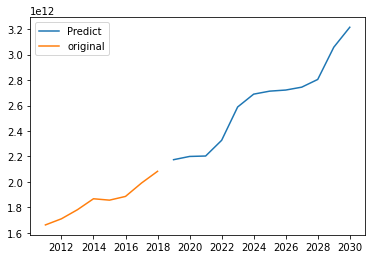

In [ ]:
dfpred3
plt.plot(dfpred3['Year'],dfpred3['GDP'], label='Predict')
plt.plot(dfCAGDP['Year'],dfCAGDP['GDP'], label='original')
plt.legend(loc='best')

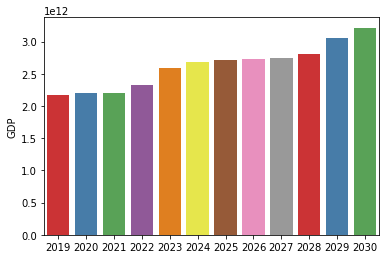

In [ ]:
x3_pred = np.array([2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030])
sns.barplot(x=x3_pred, y='GDP', data=dfpred3, palette='Set1')

In [ ]:
dfpred3

,Year,multiplier,xk,industry,expenditure,exgrowth,GDPgrowth,GDP
Year,,,,,,,,
2019-01-01,2019-01-01,2.586841e+05,4.177834,3.253757e+06,2.047141e+07,352235.982582,9.111784e+10,2174496841852
2020-01-01,2020-01-01,8.305386e+04,4.225297,2.946418e+06,2.016415e+07,-307261.444156,2.551925e+10,2200016091433
2021-01-01,2021-01-01,1.905244e+05,4.270558,2.928849e+06,2.014666e+07,-17494.056995,3.333045e+09,2203349136287
2022-01-01,2022-01-01,1.905284e+06,4.315475,2.993494e+06,2.021138e+07,64718.931745,1.233079e+11,2326657081002
2023-01-01,2023-01-01,4.066928e+05,4.358228,3.636873e+06,2.085483e+07,643449.458896,2.616862e+11,2588343325666
2024-01-01,2024-01-01,2.615704e+05,4.400676,3.251101e+06,2.046912e+07,-385702.184739,1.008883e+11,2689231618042
2025-01-01,2025-01-01,2.778558e+05,4.441000,3.166195e+06,2.038428e+07,-84839.807525,2.357323e+10,2712804849091
2026-01-01,2026-01-01,4.297973e+04,4.481057,3.366461e+06,2.058462e+07,200332.303555,8.610229e+09,2721415077921
2027-01-01,2027-01-01,6.076690e+04,4.519029,3.739108e+06,2.095733e+07,372709.607192,2.264841e+10,2744063486634
